In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../../output/input_calculators_calculated.csv.gz", parse_dates = ["creatinine_numeric_value_date", "creatinine_clearance_numeric_value_date"])

Find all people with creatinine recorded in last year. How many have creatinine clearance recorded?

In [17]:
subset = df.loc[df["creatinine_numeric_value_date"] > "2021-07-01",:]
print(f"{len(subset)} have creatinine in last year")

subset_with_crcl = subset.loc[subset["creatinine_clearance_numeric_value_date"] >= subset["creatinine_numeric_value_date"],:]
print(f"with crcl on or after creatinine: {len(subset_with_crcl)}")

160 have creatinine in last year
with crcl on or after creatinine: 11


Creatinine clearance recorded vs creatinine clearance calculated

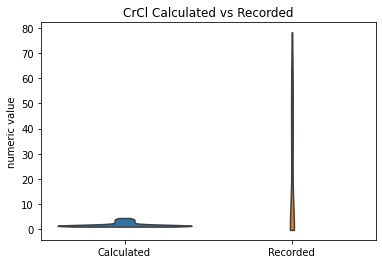

<Figure size 432x288 with 0 Axes>

In [19]:
latest_crcl_calculated = df["cg"][df["cg"].notnull()]
latest_crcl_recorded = df["creatinine_clearance_numeric_value"][df["creatinine_clearance_numeric_value"].notnull()
]

percentiles = np.arange(0.01, 0.99, 0.01)
percentile_values_crcl_calculated = np.quantile(a=latest_crcl_calculated, q=percentiles)
percentile_values_crcl_recorded = np.quantile(a=latest_crcl_recorded, q=percentiles)

violin_df = pd.DataFrame({
    "Calculated": pd.Series(percentile_values_crcl_calculated),
    "Recorded": pd.Series(percentile_values_crcl_recorded)
})

sns.violinplot(data=violin_df, cut=0, inner=None)
plt.title("CrCl Calculated vs Recorded")
plt.ylabel("numeric value")
# plt.savefig(OUTPUT_DIR / f"violin_plot_crcl_recorded_vs_calculated.png")
plt.show()
plt.clf()





<function matplotlib.pyplot.show(close=None, block=None)>

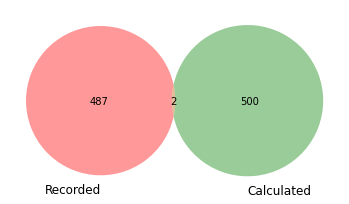

In [22]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

num_people_just_recorded = df.loc[((df["creatinine_clearance_numeric_value"].notnull()) & (df["creatinine_clearance_numeric_value"]> 0) & (df["cg"].isnull())),:]
num_people_just_calculated = df.loc[((df["cg"].notnull()) & (df["cg"]> 0) & ((df["creatinine_clearance_numeric_value"].isnull())) | (df["creatinine_clearance_numeric_value"]==0)),:]
num_people_both = df.loc[(df["cg"].notnull()) & (df["cg"]> 0) & ((df["creatinine_clearance_numeric_value"].notnull()) & (df["creatinine_clearance_numeric_value"]> 0)),:]

venn2(subsets = (len(num_people_just_recorded), len(num_people_just_calculated), len(num_people_both)), set_labels = ('Recorded', 'Calculated'))
plt.show